### Author Statement
This project has been developed by Mustafa Neguib who is a student of
Masters of Information Technology at The University of Melbourne.
You can contact the developer at mustafa.neguib@gmail.com
Website: http://www.mustafaneguib.com
github: http://github.com/mustafaneguib/

In [32]:
import os
import numpy as np
import geopandas
import pandas as pd
import ast
from shapely import geometry
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import DBSCAN
from dateutil.parser import parse
import datetime
from rtree import index


In [156]:
def create_output_directory():
    # This function is the first one to run, so we want to make sure that the output folder is
    # created before all other functions run.
    try:
        os.mkdir("output")
    except FileExistsError:
        # The folder already exists, so do nothing.
        pass

def read_csv_file(csv_file_name, required_columns):
    """
    This function reads in the csv file and then checks if the file has the correct
    number of columns and also if the column names are correct.
    :param csv_file_name: A string containing the name of the csv file to read.
    :param required_columns: A list containing the column names that are required by this project for the file.
    :return: data_frame is a pandas data frame which contains the data read from the csv file

    """

    execution_halted_str = 'Execution halted in the function read_csv_file!!!'
    path_of_file = os.path.join(os.getcwd(), csv_file_name)
    if os.path.exists(path_of_file):
        data_frame = pd.read_csv(path_of_file)

        if data_frame.columns.size == len(required_columns):

            # This code is checking if the column exists, no matter in what order it comes in the
            # csv file. This means that as long as the column exists in the csv file we do not care,
            # whether it is the first column, or the last column.

            found_invalid_columns = False
            invalid_columns = []
            for column in required_columns:
                try:
                    # If the column is not in the data frame, then a ValueError will be thrown, which
                    # will tell me that there was a problem. If no such error is thrown then the data frame
                    # has all of the required columns.
                    list(data_frame.columns).index(column)
                except ValueError as value_error:
                    found_invalid_columns = True
                    invalid_columns.append(column)

            if found_invalid_columns:
                raise Exception(
                    '{} The csv file {} provided does not contain the column(s) {}.'.format(execution_halted_str,
                                                                                            csv_file_name,
                                                                                            ', '.join(invalid_columns)))
            return data_frame
        else:
            raise Exception(
                "{} The csv file {} does not contain all of the required columns. Please check the file and ensure that the columns and their names are correct.".format(
                    execution_halted_str, csv_file_name))
    else:
        raise FileNotFoundError(
            "{} The csv file {} was not found in the current directory.".format(execution_halted_str, csv_file_name))

def read_excel_file(csv_file_name, required_columns):
    """
    This function reads in the csv file and then checks if the file has the correct
    number of columns and also if the column names are correct.
    :param csv_file_name: A string containing the name of the csv file to read.
    :param required_columns: A list containing the column names that are required by this project for the file.
    :return: data_frame is a pandas data frame which contains the data read from the csv file

    """

    execution_halted_str = 'Execution halted in the function read_csv_file!!!'
    path_of_file = os.path.join(os.getcwd(), csv_file_name)
    if os.path.exists(path_of_file):
        data_frame = pd.read_excel(path_of_file)

        if data_frame.columns.size == len(required_columns):

            # This code is checking if the column exists, no matter in what order it comes in the
            # csv file. This means that as long as the column exists in the csv file we do not care,
            # whether it is the first column, or the last column.

            found_invalid_columns = False
            invalid_columns = []
            for column in required_columns:
                try:
                    # If the column is not in the data frame, then a ValueError will be thrown, which
                    # will tell me that there was a problem. If no such error is thrown then the data frame
                    # has all of the required columns.
                    list(data_frame.columns).index(column)
                except ValueError as value_error:
                    found_invalid_columns = True
                    invalid_columns.append(column)

            if found_invalid_columns:
                raise Exception(
                    '{} The csv file {} provided does not contain the column(s) {}.'.format(execution_halted_str,
                                                                                            csv_file_name,
                                                                                            ', '.join(invalid_columns)))
            return data_frame
        else:
            raise Exception(
                "{} The csv file {} does not contain all of the required columns. Please check the file and ensure that the columns and their names are correct.".format(
                    execution_halted_str, csv_file_name))
    else:
        raise FileNotFoundError(
            "{} The csv file {} was not found in the current directory.".format(execution_halted_str, csv_file_name))


def read_shape_file(shape_file_name, required_columns):
    """
    This function reads in the provided shape file from the disk
    :param shape_file_name:  A string containing the name of the shape file to read.
    :param required_columns: A list containing the column names that are required by this project for the file.
    :return: geo_data_frame is a geopandas data frame which contains the data read from the shape file
    """

    execution_halted_str = 'Execution halted in the function read_shape_file!!!'
    path_of_file = os.path.join(os.getcwd(), shape_file_name)
    if os.path.exists(path_of_file):

        # This code is checking if the column exists, no matter in what order it comes in the
        # csv file. This means that as long as the column exists in the csv file we do not care,
        # whether it is the first column, or the last column.

        geo_data_frame = geopandas.read_file(shape_file_name)
        if geo_data_frame.columns.size == len(required_columns):

            # This code is checking if the column exists, no matter in what order it comes in the
            # csv file. This means that as long as the column exists in the csv file we do not care,
            # whether it is the first column, or the last column.

            found_invalid_columns = False
            invalid_columns = []
            for column in required_columns:
                try:
                    # If the column is not in the data frame, then a ValueError will be thrown, which
                    # will tell me that there was a problem. If no such error is thrown then the data frame
                    # has all of the required columns.
                    list(geo_data_frame.columns).index(column)
                except ValueError as value_error:
                    found_invalid_columns = True
                    invalid_columns.append(column)

            if found_invalid_columns:
                raise Exception(
                    '{} The shape file {} provided does not contain the column(s) {}.'.format(execution_halted_str,
                                                                                              shape_file_name,
                                                                                              ', '.join(
                                                                                                  invalid_columns)))
            return geo_data_frame
        else:
            raise Exception(
                "{} The shape file {} does not contain all of the required columns. Please check the file and ensure that the columns and their names are correct.".format(
                    execution_halted_str, shape_file_name))

    else:
        raise FileNotFoundError(
            "{} The shape file {} was not found in the current directory.".format(execution_halted_str,
                                                                                  shape_file_name))
def read_geojson_file(geojson_file_name, required_columns):
    """
    This function reads in the provided shape file from the disk
    :param geojson_file_name:  A string containing the name of the shape file to read.
    :param required_columns: A list containing the column names that are required by this project for the file.
    :return: geo_data_frame is a geopandas data frame which contains the data read from the shape file
    """

    execution_halted_str = 'Execution halted in the function read_geojson_file!!!'
    path_of_file = os.path.join(os.getcwd(), geojson_file_name)
    if os.path.exists(path_of_file):

        # This code is checking if the column exists, no matter in what order it comes in the
        # csv file. This means that as long as the column exists in the csv file we do not care,
        # whether it is the first column, or the last column.

        geo_data_frame = geopandas.read_file(geojson_file_name)
        if geo_data_frame.columns.size == len(required_columns):

            # This code is checking if the column exists, no matter in what order it comes in the
            # csv file. This means that as long as the column exists in the csv file we do not care,
            # whether it is the first column, or the last column.

            found_invalid_columns = False
            invalid_columns = []
            for column in required_columns:
                try:
                    # If the column is not in the data frame, then a ValueError will be thrown, which
                    # will tell me that there was a problem. If no such error is thrown then the data frame
                    # has all of the required columns.
                    list(geo_data_frame.columns).index(column)
                except ValueError as value_error:
                    found_invalid_columns = True
                    invalid_columns.append(column)

            if found_invalid_columns:
                raise Exception(
                    '{} The geojson file {} provided does not contain the column(s) {}.'.format(execution_halted_str,
                                                                                              geojson_file_name,
                                                                                              ', '.join(
                                                                                                  invalid_columns)))
            return geo_data_frame
        else:
            raise Exception(
                "{} The geojson file {} does not contain all of the required columns. Please check the file and ensure that the columns and their names are correct.".format(
                    execution_halted_str, geojson_file_name))

    else:
        raise FileNotFoundError(
            "{} The geojson file {} was not found in the current directory.".format(execution_halted_str,
                                                                                  geojson_file_name))        
def build_geometry(data):
    """
    This function builds a Shapely Point geometry based on the longitude and latitude values.
    :param data: Pandas data frame
    :return: Shapely Point geometry
    """
    location=data['long_lat']
    longitude=location.split()[0]
    longitude=float(ast.literal_eval(longitude))

    latitude=location.split()[1]
    latitude=float(ast.literal_eval(latitude))
    if longitude==0 and latitude==0:
        return None
    else:    
        return geometry.Point(longitude, latitude)

def build_longitude(data):
    """
    This function builds a Shapely Point geometry based on the longitude and latitude values.
    :param data: Pandas data frame
    :return: Shapely Point geometry
    """
    location=data['long_lat']
    longitude=location.split()[0]
    longitude=float(ast.literal_eval(longitude))

    latitude=location.split()[1]
    latitude=float(ast.literal_eval(latitude))
    if longitude==0 and latitude==0:
        return None
    else:    
        return longitude
    
def build_latitude(data):
    """
    This function builds a Shapely Point geometry based on the longitude and latitude values.
    :param data: Pandas data frame
    :return: Shapely Point geometry
    """
    location=data['long_lat']
    longitude=location.split()[0]
    longitude=float(ast.literal_eval(longitude))

    latitude=location.split()[1]
    latitude=float(ast.literal_eval(latitude))
    if longitude==0 and latitude==0:
        return None
    else:    
        return latitude

def write_to_shape_file(dataframe, file_name):
    """
    This function writes the dataframe to a shape file. This function also ensures
    that the folder output exists.
    :param dataframe: geopandas dataframe
    :param file_name: string name for the file
    :return: string path to the file
    """
    execution_halted_str = 'Execution halted in the function write_to_shape_file!!!'
    path_of_directory = os.path.join(os.getcwd(), "output")
    path_of_file = os.path.join(os.getcwd(), "output", file_name)
    if os.path.exists(path_of_directory):
        dataframe.to_file(path_of_file)
        return path_of_file
    else:
        raise FileNotFoundError(
            "{} The file {} was not found in the current directory.".format(execution_halted_str,
                                                                            path_of_directory))    
        
def write_to_geojson_file(dataframe, file_name):
    """
    This function writes the dataframe to a shape file. This function also ensures
    that the folder output exists.
    :param dataframe: geopandas dataframe
    :param file_name: string name for the file
    :return: string path to the file
    """
    execution_halted_str = 'Execution halted in the function write_to_shape_file!!!'
    path_of_directory = os.path.join(os.getcwd(), "output")
    path_of_file = os.path.join(os.getcwd(), "output", file_name)
    if os.path.exists(path_of_directory):
        dataframe.to_file(path_of_file, driver="GeoJSON")
        return path_of_file
    else:
        raise FileNotFoundError(
            "{} The file {} was not found in the current directory.".format(execution_halted_str,
                                                                            path_of_directory))            

def get_columns_from_data(data, columns):
    """
    This function is a wrapper around the indexing of pandas data frames. This function gets all of the rows
    from the data frame.
    :param data: Pandas data frame
    :param columns: The columns which are to be selected.
    :return: Pandas data frame
    """
    return data.loc[:, columns]


def get_columns_from_data_range_rows(data, start_row, end_row, columns):
    """
    This function is a wrapper around the indexing of pandas data frames. This function gets some of the rows
    from the data frame specified by the start_row and end_row.
    :param data: Pandas data frame
    :param start_row: int value specifying the row to start from
    :param end_row: int value specifying the row to end at
    :param columns: The columns which are to be selected.
    :return: Pandas data frame
    """
    return data.loc[start_row:end_row, columns]   

def group_by_data(data, columns):
    """
    This is a wrapper function which wraps around the pandas group by function.
    :param data: Pandas data frame
    :param columns: The columns which are to be used to be group the data frame on
    :return: Pandas data frame
    """
    return data.groupby(columns).size().to_frame('count').reset_index()

def plot_bar_plot(x, y, x_axis_label, y_axis_label, title):
    """
    This function plots a bar plot of values of x against the y
    :param x: list of x values
    :param y: list of y values
    :param x_axis_label: list of labels for x
    :param y_axis_label: list of labels for y
    :param title: string value for the title of the plot
    :return: the filename of the figure that has been saved.
    """
    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_xlabel(x_axis_label, fontsize=10)
    ax.set_ylabel(y_axis_label, fontsize=10)
    ax.set_xticks(x)
    ax.set_xticklabels(x, fontsize=10, rotation=90)
    ax.set_title(title)
    # ax.legend(loc='upper right', frameon=True)
    plt.show()
    file_name = ((((title + '.png').replace('/', ''))).replace(' ', '_')).lower()
    # fig.savefig('output/' + file_name, dpi=100, bbox_inches='tight')
    return write_to_image_file(fig, file_name, False, 100)

def write_to_image_file(figure, file_name, more_options, dpi):
    """
    This function writes an image file. This function also ensures
    that the folder output exists.
    :param figure: matplotlib figure
    :param file_name: string name of the file
    :param more_options: boolean whether we want more options or not
    :param dpi: int value for the dpi
    :return: string path to the file
    """
    execution_halted_str = 'Execution halted in the function write_to_image_file!!!'
    path_of_directory = os.path.join(os.getcwd(), "output")
    path_of_file = os.path.join(os.getcwd(), "output", file_name)
    if os.path.exists(path_of_directory):
        if more_options:
            figure.savefig(path_of_file, dpi=dpi, cmap='summer', edgecolor='black', linewidth=0.2, alpha=1,
                           bbox_inches='tight')
        else:
            figure.savefig(path_of_file, dpi=dpi, bbox_inches='tight')
        return path_of_file
    else:
        raise FileNotFoundError(
            "{} The file {} was not found in the current directory.".format(execution_halted_str,
                                                                            path_of_directory))

def plot_db_scan(X, model):
    """
    This code plots the clustered points. This function has been inspired from the
    DBSCAN example (https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html) and the example provide
    by Elham https://notebooks.azure.com/ElhamN/projects/GEOM90042-1/html/L6/plotClusters.py
    :param X: a 2D numpy array of coordinates
    :param model: a model containg the DBSCAN result
    """
    # plotting the results
    labels = model.labels_
    core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
    core_samples_mask[model.core_sample_indices_] = True
    print(len(labels))
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
        plt.savefig('output/dbscan_cluster1.png', dpi=200, bbox_inches='tight')
        return write_to_image_file(plt, "dbscan_cluster.png", False, 100)

def get_type_of_hour_day(data):
    """
    This function returns a string representation of the type of hour of day
    :param x: int value of hour
    :return: string representation of the type of hour of day
    """
    
    time_of_accident = data['Time Occurred']
    hour = int(time_of_accident/100)
    if hour >= 0 and hour <= 5:
        return 'Early Morning'
    elif hour >= 6 and hour <= 11:
        return 'Morning'
    elif hour >= 12 and hour <= 14:
        return 'Early Afternoon'
    elif hour >= 15 and hour <= 17:
        return 'Afternoon'
    elif hour >= 18 and hour <= 19:
        return 'Early Evening'
    elif hour >= 20 and hour <= 23:
        return 'Night'
    
def categorize_type_of_day(data):
    """
    This function returns either the day provided is a week day or a weekend.
    :param x: string value of day
    :return: string
    """
    date_of_accident = parse(data['Date Occurred'].split('T')[0])
    weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
    day_type = weekDays[date_of_accident.weekday()]

    if day_type == 'Monday':
        return 'Week Day'
    elif day_type == 'Tuesday':
        return 'Week Day'
    elif day_type == 'Wednesday':
        return 'Week Day'
    elif day_type == 'Thursday':
        return 'Week Day'
    elif day_type == 'Friday':
        return 'Week Day'
    else:
        return 'Weekend'   
    
def seperate_years(data):
    return parse(data['Date Occurred'].split('T')[0]).year    

def concat_day_hour_type(data):
    return data['DAY_TYPE']+'-'+data['HOUR_TYPE']

def specify_descent(data):
    descents={
    "A":"Other Asian", "B":"Black","C":"Chinese","D":"Cambodian",
    "F":"Filipino","G":"Guamanian","H":"Hispanic/Latin/Mexican",
    "I":"American Indian/Alaskan Native","J":"Japanese",
    "K":"Korean","L":"Laotian","O":"Other","P":"Pacific Islander",
    "S":"Samoan","U":"Hawaiian","V":"Vietnamese","W":"White",
    "X":"Unknown","Z":"Asian Indian"
    }
    return descents[data['Victim Descent']]

def get_age_range(age, bins):
    bins = [int(x) for x in bins]
    age_bin=[]
    for i, val in enumerate(bins):
        if i==0:
            age_bin.append((bins[i],bins[i+1]))
        elif i>0 and i<len(bins)-1:
            age_bin.append((bins[i]+1,bins[i+1]))
    range=""
    for bin in age_bin:
        if age >= bin[0] and age<=bin[1]:
            range="{}-{}".format(bin[0],bin[1])
            break

    if range is "":
        return "{}+".format(age_bin[-1][1])
        
    else:
        return range
        
def get_salary_range(salary, bins):
    bins = [int(x) for x in bins]
    bins_sets=[]
    for i, val in enumerate(bins):
        if i==0:
            bins_sets.append((bins[i],bins[i+1]))
        elif i>0 and i<len(bins)-1:
            bins_sets.append((bins[i]+1,bins[i+1]))
    range=""
    for bin in bins_sets:
        if salary >= bin[0] and salary<=bin[1]:
            range="{}-{}".format(bin[0],bin[1])
            break

    if range is "":
        return "{}+".format(bins_sets[-1][1])
    else:
        return range 
    
def sort_ranges(range_bin, ranges, count_list):
    # The following code gets the order of the range according to the bin associated with that range, and then 
    # in the end sorts the ranges based on the index that has been retrieved bringing the ranges in the correct order.
    range_bins=[]
    for i,r in enumerate(ranges):
        if '+' in r:
            p1=int(r.split('+')[0])            
            if p1>= range_bin[-1][1]:
                range_bins.append([len(range_bin)-1,r, count_list[i]])
        else:            
            p1=int(r.split('-')[0])
            p2=int(r.split('-')[1])
            index=range_bin.index((p1,p2))
            range_bins.append([index,r, count_list[i]])
    range_bins=sorted(range_bins, key=lambda x: x[0])
    range_bin=[x[1] for x in range_bins]
    range_counts=[x[2] for x in range_bins]
    return range_bin, range_counts
    
    

In [82]:
create_output_directory()

In [83]:
required_columns = ["status","card_present_flag","bpay_biller_code","account","currency","long_lat","txn_description","merchant_id","merchant_code","first_name","balance","date","gender","age","merchant_suburb","merchant_state","extraction","amount","transaction_id","country","customer_id","merchant_long_lat","movement"]
data_frame = read_excel_file("anz_dataset.xlsx", required_columns)

In [84]:
data_frame.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [85]:
data_frame.head()
salary_trans = data_frame[data_frame['txn_description']=='PAY/SALARY']
#accidents_locations_area_name=get_columns_from_data(accidents_locations_zones, ['DR Number','Area Name'])
male_salary=salary_trans[salary_trans['gender']=='M']
female_salary=salary_trans[salary_trans['gender']=='F']

In [86]:
average_male_salary=male_salary['amount'].values.mean()
average_female_salary=female_salary['amount'].values.mean()

In [39]:
average_male_salary

2096.811681034483

In [40]:
average_female_salary

1679.370477326969

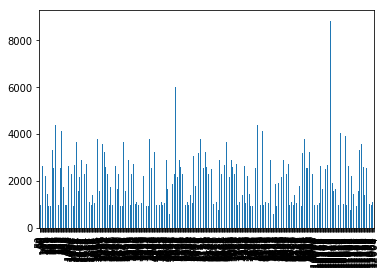

In [41]:
male_salary['amount'].plot(kind='bar')

In [87]:
data_frame['geometry'] = data_frame.apply(build_geometry, axis=1)
data_frame['longitude'] = data_frame.apply(build_longitude, axis=1)
data_frame['latitude'] = data_frame.apply(build_latitude, axis=1)
anz_transactions = data_frame.loc[data_frame['geometry'].notnull()]
anz_transactions = geopandas.GeoDataFrame(anz_transactions, geometry=anz_transactions.geometry)
anz_transactions.crs = {'init': 'epsg:4326', 'no_defs': True}
bins=np.linspace(anz_transactions['age'].values.min(),anz_transactions['age'].values.max(), 10)
anz_transactions['AGE_RANGE']=anz_transactions['age'].apply(get_age_range, args=(bins,))

In [ ]:
anz_transactions_pos_pos_sales = anz_transactions[(anz_transactions['txn_description']=='POS') | (anz_transactions['txn_description']=='SALES-POS')]

In [ ]:
#get_columns_from_data(anz_transactions_pos_pos_sales,[])
anz_transactions_pos_pos_sales.columns

In [ ]:
#anz_transactions_pos_pos_sales
#write_to_geojson_file(anz_transactions_pos_pos_sales,"anz_transactions_pos_pos_sales.geojson")

In [ ]:
grouped_by_age=group_by_data(anz_transactions_pos_pos_sales,['AGE_RANGE'])
grouped_by_age

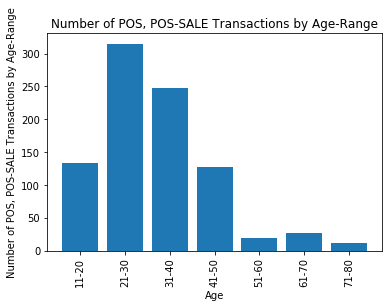

'D:\\data analysis\\anz internship\\output\\number_of_pos,_pos-sale_transactions_by_age-range.png'

In [93]:
grouped_age = list(grouped_by_age['AGE_RANGE'])
grouped_age_count=list(grouped_by_age['count'])
plot_bar_plot(grouped_age, grouped_age_count, 'Age', 'Number of POS, POS-SALE Transactions by Age-Range',
                              'Number of POS, POS-SALE Transactions by Age-Range')


In [ ]:
salary_trans = anz_transactions[(anz_transactions['txn_description']=='PAY/SALARY')]
grouped_by_age=group_by_data(salary_trans,['AGE_RANGE'])
grouped_by_age
grouped_age = list(grouped_by_age['AGE_RANGE'])
grouped_age_count=list(grouped_by_age['count'])
plot_bar_plot(grouped_age, grouped_age_count, 'Age', 'Number of PAY/SALARY Transactions by Age-Range',
                              'Number of PAY/SALARY Transactions by Age-Range')


In [119]:
bins=np.linspace(salary_trans['amount'].values.min(),salary_trans['amount'].values.max(), 10)
salary_trans['SALARY_RANGE']=salary_trans['amount'].apply(get_salary_range, args=(bins,))
grouped_by_salary=group_by_data(salary_trans,['SALARY_RANGE'])
grouped_salary = list(grouped_by_salary['SALARY_RANGE'])
grouped_salary_count=list(grouped_by_salary['count'])
grouped_salary

C:\Users\Mustafa Neguib\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


['1494-2411',
 '2412-3329',
 '3330-4247',
 '4248-5164',
 '5165-6082',
 '576-1493',
 '6083-7000',
 '8835+']

In [158]:
ranges=['61-70','51-60','21-30','90+']
count_list=[2,3,4,5]
x,y=sort_ranges(age_bin, ranges, count_list)
age_bin

[(0, 10),
 (11, 20),
 (21, 30),
 (31, 40),
 (41, 50),
 (51, 60),
 (61, 70),
 (71, 80),
 (81, 90)]

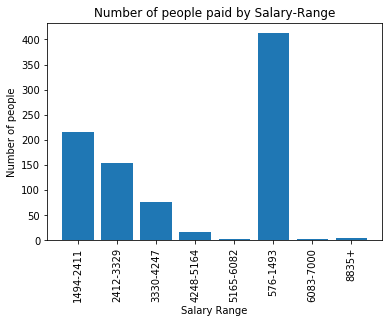

'D:\\data analysis\\anz internship\\output\\number_of_people_paid_by_salary-range.png'

In [142]:
plot_bar_plot(grouped_salary, grouped_salary_count, 'Salary Range', 'Number of people',
                             'Number of people paid by Salary-Range')

In [ ]:
bins=np.linspace(salary_trans['amount'].values.min(),salary_trans['amount'].values.max(), 10)
bins = [int(x) for x in bins]
bins_sets=[]
for i, val in enumerate(bins):
    if i==0:
        bins_sets.append((bins[i],bins[i+1]))
    elif i>0 and i<len(bins)-1:
        bins_sets.append((bins[i]+1,bins[i+1]))

In [ ]:
bins_sets

In [45]:
s = pd.Series([20, 21, 12], index=['London', 'New York', 'Helsinki'])

In [46]:
s

London      20
New York    21
Helsinki    12
dtype: int64

In [47]:
def subtract_custom_value(x, custom_value):
    print(x)
    print(custom_value)

In [54]:
s.apply(subtract_custom_value, args=(bins,))

20
[18.         24.66666667 31.33333333 38.         44.66666667 51.33333333
 58.         64.66666667 71.33333333 78.        ]
21
[18.         24.66666667 31.33333333 38.         44.66666667 51.33333333
 58.         64.66666667 71.33333333 78.        ]
12
[18.         24.66666667 31.33333333 38.         44.66666667 51.33333333
 58.         64.66666667 71.33333333 78.        ]


London      None
New York    None
Helsinki    None
dtype: object

In [101]:
bins=np.linspace(0,110, 10)
age_bin=[(0,10),(11,20),(21,30),(31,40),(41,50),(51,60),(61,70),(71,80),(81,90)]

bins

array([  0.        ,  12.22222222,  24.44444444,  36.66666667,
        48.88888889,  61.11111111,  73.33333333,  85.55555556,
        97.77777778, 110.        ])

In [111]:
# The following code gets the order of the range according to the bin associated with that range, and then 
# in the end sorts the ranges based on the index that has been retrieved bringing the ranges in the correct order.
ranges=['61-70','51-60','21-30']
num=bins[5]
range_bins=[]
for range in ranges:
    p1=int(range.split('-')[0])
    p2=int(range.split('-')[1])
    index=age_bin.index((p1,p2))
    print(index)
    range_bins.append([index,range])
range_bins    
sorted(range_bins, key=lambda x: x[0])

6
5
2


[[2, '21-30'], [5, '51-60'], [6, '61-70']]

In [105]:
age_bin.index((61,70))

6

In [134]:
num_st='20-30'
'+' in num_st

False